# Ejercicio 1

Implemente un perceptron multicapa y utilíselo para aprender los siguientes problemas:
*   Función lógica ’O exclusivo’ con entradas
    *   x = {{-1, 1}, {1, -1}, {-1, -1}, {1, 1}},
    *   y salida esperada y = {1, 1, -1, -1}.

In [ ]:
import numpy as np

def tangente_hiperbolica(x):
  return np.tanh(x)

def derivada_tangente_hiperbolica(x):
  return 1 - np.tanh(x)**2

def entrenar_perceptron_multi_tangente(entradas, salidas_esperada, capa_oculta=2,
                                       tasa_aprendizaje=0.1, iteraciones=15000):
  n_entradas, n_caracteristicas = entradas.shape
  salidas_esperada = salidas_esperada.reshape(-1, 1)

  np.random.seed(42)
  w = np.random.rand(n_caracteristicas, capa_oculta) # Pesos a capa oculta
  b = np.zeros((1, capa_oculta)) # Sesgo
  W = np.random.rand(capa_oculta, 1) # Pesos de oculta a salida
  B = np.zeros((1, 1)) # Sesgo

  for epoca in range(iteraciones):
      # Propagación
      excitacion_v = np.dot(entradas, w) + b
      activacion_v = tangente_hiperbolica(excitacion_v)

      excitacion_O = np.dot(activacion_v, W) + B
      activacion_O = tangente_hiperbolica(excitacion_O)

      # Error
      error = salidas_esperada - activacion_O

      # Retropropagacion
      delta_O = derivada_tangente_hiperbolica(excitacion_O) * error
      ΔWO = tasa_aprendizaje * np.dot(activacion_v.T,delta_O)
      ΔBO = tasa_aprendizaje * np.sum(delta_O, axis=0)


      delta_v = derivada_tangente_hiperbolica(excitacion_v) * np.dot(delta_O,W.T)
      Δwv = tasa_aprendizaje * np.dot(entradas.T,delta_v)
      Δbv = tasa_aprendizaje * np.sum(delta_v, axis=0)

      # Actualizaciones pesos y bias
      W = W + ΔWO  # Pesos y bias de oculta a salida
      B = B + ΔBO

      w = w + Δwv # Pesos y bias de entrada a oculta
      b = b + Δbv

  return w, b, W, B

# Predicción
def predecir_perceptron_multi_tangente(entradas, w, b, W, B):
  suma_oculta = np.dot(entradas, w) + b
  salida_oculta = tangente_hiperbolica(suma_oculta)
  suma_salida = np.dot(salida_oculta, W) + B
  predicciones = tangente_hiperbolica(suma_salida)
  return predicciones

entradas = np.array ([[-1,1], [1 ,-1], [-1, -1], [1, 1]])
salidas_deseadas_o = np.array ([1, 1, -1, -1])

# Entrenamiento
w, b, W, B = entrenar_perceptron_multi_tangente(entradas, salidas_deseadas_o)

# Predicciones
prediccion = predecir_perceptron_multi_tangente(entradas, w, b, W, B)
print("Predicciones:")
print(prediccion)

Predicciones:
[[ 0.99321714]
 [ 0.99321667]
 [-0.99065068]
 [-0.99060358]]


* Grafico de la frontera de decisión

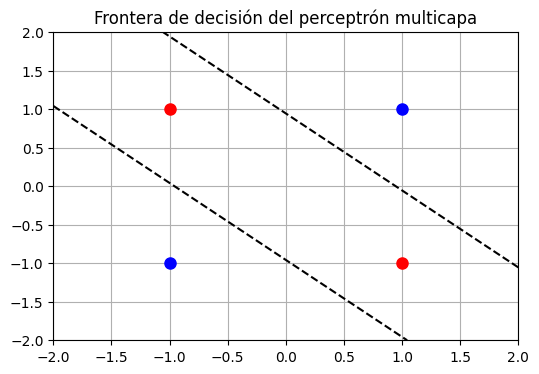

In [ ]:
import matplotlib.pyplot as plt

# Tamaño del gráfico
plt.figure(figsize=(6, 4))

# Graficamos los puntos de datos
for i in range(len(entradas)):
  if salidas_deseadas_o[i] == 1:
    # Puntos color rojo para clase 1
    plt.plot(entradas[i, 0], entradas[i, 1], 'ro', markersize=8)
  else:
    # Puntos color azul para clase -1
    plt.plot(entradas[i, 0], entradas[i, 1], 'bo', markersize=8)

# Creamos una malla para estimar la frontera
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = predecir_perceptron_multi_tangente(grid, w, b, W, B)
Z = Z.reshape(xx.shape)

# Dibujamos la línea de decisión (contorno donde la salida es 0)
contorno = plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='--')

plt.title('Frontera de decisión del perceptrón multicapa')
plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# Ejercicio 2

Discriminar si un número es par, con entradas dadas por el conjunto de números
decimales del 0 al 9 (usar archivo Datos.txt)
representados por imágenes de 5 x 7 pixeles.
* Entrene con un subconjunto de los dígitos y utilice el resto para testear a la red. ¿Qué podría
decir acerca de la capacidad para generalizar de la red?


In [ ]:
import numpy as np

# Cargamos el archivo
datos = np.loadtxt("/content/Datos.txt")

# Separamos cada 7 filas como una imagen de 5x7 píxeles
imagenes = []
for i in range(0, datos.shape[0], 7):
  imagen = datos[i:i+7, :].flatten() # 7 filas x 5 columnas = 35 píxeles
  imagenes.append(imagen)

imagenes = np.array(imagenes) # forma (10, 35)

# Crear etiquetas: 1 si es par, 0 si es impar
etiquetas = []
for i in range(len(imagenes)):
  if i % 2 == 0:
    etiquetas.append(1)
  else:
    etiquetas.append(0)

etiquetas = np.array(etiquetas) # 0-9
print(etiquetas)
print("Imagen del número:\n", imagenes[0].reshape(7, 5))

[1 0 1 0 1 0 1 0 1 0]
Imagen del número:
 [[0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 1.]
 [1. 0. 1. 0. 1.]
 [1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 0.]]


In [ ]:
import numpy as np

def sigmoidea(x):
  return 1 / (1 + np.exp(-x))

def derivada_sigmoidea(x):
  s = sigmoidea(x)
  return s * (1 - s)

def entrenar_perceptron_multi_sigmoidea(entradas, salidas_esperadas, capa_oculta=2,
                                        tasa_aprendizaje=0.1, max_iteraciones=10000):

  n_entradas, n_caracteristicas = entradas.shape
  salidas_esperadas = salidas_esperadas.reshape(-1, 1)

  np.random.seed(42)
  w = np.random.rand(n_caracteristicas, capa_oculta) # Pesos a capa oculta
  b = np.zeros((1, capa_oculta)) # Sesgo
  W = np.random.rand(capa_oculta, 1) # Pesos de oculta a salida
  B = np.zeros((1, 1)) # Sesgo

  for epoca in range(max_iteraciones):
    # Propagación
    excitacion_v = np.dot(entradas, w) + b
    activacion_v = sigmoidea(excitacion_v)

    excitacion_O = np.dot(activacion_v, W) + B
    activacion_O = sigmoidea(excitacion_O)

    # Error
    error = salidas_esperadas - activacion_O

    # Retropropagacion
    delta_O = derivada_sigmoidea(excitacion_O) * error
    ΔWO = tasa_aprendizaje * np.dot( activacion_v.T,delta_O)
    ΔBO = tasa_aprendizaje * np.sum(delta_O, axis=0)


    delta_v = derivada_sigmoidea(excitacion_v) * np.dot(delta_O,W.T)
    Δwv = tasa_aprendizaje * np.dot(entradas.T,delta_v)
    Δbv = tasa_aprendizaje * np.sum(delta_v, axis=0)

    # Actualizaciones pesos y bias
    W = W + ΔWO  # Pesos y bias de oculta a salida
    B = B + ΔBO

    w = w + Δwv # Pesos y bias de entrada a oculta
    b = b + Δbv

  return w, b, W, B

# Predicción
def predecir_perceptron_multi_sigmoidea(entradas, w, b, W, B):
  suma_oculta = np.dot(entradas, w) + b
  salida_oculta = sigmoidea(suma_oculta)
  suma_salida = np.dot(salida_oculta, W) + B
  predicciones = sigmoidea(suma_salida)
  return predicciones

# Entrenamiento
w, b, W, B = entrenar_perceptron_multi_sigmoidea(imagenes, etiquetas)

# Predicciones
salidas = predecir_perceptron_multi_sigmoidea(imagenes, w, b, W, B)
salidas_concreta = (salidas > 0.5).astype(int)
print("Predicciones: \n", salidas_concreta)

Predicciones: 
 [[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.3, random_state=1234)

# Entrenamiento
w, b, W, B = entrenar_perceptron_multi_sigmoidea(X_train, y_train, capa_oculta=3, tasa_aprendizaje=0.1, max_iteraciones=20000)

# Predicción sobre test
y_pred = predecir_perceptron_multi_sigmoidea(X_test, w, b, W, B)
y_pred_labels = np.where(y_pred >= 0.5, 1, 0)

print("Predicciones:", y_pred_labels.flatten())
print("Esperado    :", y_test.flatten())

precision = np.mean(y_pred_labels.flatten() == y_test.flatten())
print("Presición:", precision)

# Test sobre TODOS los dígitos
y_pred_total = predecir_perceptron_multi_sigmoidea(imagenes, w, b, W, B)
y_pred_labels_total = np.where(y_pred_total >= 0.5, 1, 0)

print("Predicciones totales:", y_pred_labels_total.flatten())
print("Esperado            :", etiquetas.flatten())

pres_total = np.mean(y_pred_labels_total.flatten() == etiquetas.flatten())
print("Precisión sobre todo el conjunto:", pres_total)

Predicciones: [0 0 1]
Esperado    : [0 1 0]
Presición: 0.3333333333333333
Predicciones totales: [1 0 0 0 1 0 1 0 1 1]
Esperado            : [1 0 1 0 1 0 1 0 1 0]
Precisión sobre todo el conjunto: 0.8


**¿Qué podría decir acerca de la capacidad para generalizar de la red?**

Al entrenar la red con un subconjunto de dígitos y evaluarla con dígitos no vistos, observamos que la red tiene dificultades para generalizar correctamente la paridad. Esto sugiere que el modelo necesita ver una representación más variada de los ejemplos para aprender patrones verdaderamente generales y no simplemente memorizar los datos de entrenamiento.

# Ejercicio 3

Construya un perceptron multicapa con la misma entrada usada en 2) pero con 10
unidades de salidas de modo que cada salida represente a un dígito (por ejemplo, si se le
presenta a la red la imagen del 7, el estado de la unidad de salida número dígito 7 esté en 1
y las restantes en 0).
* Una vez que la red haya aprendido, use patrones de entrada correspondientes a los dígitos
de entrenamiento pero con sus píxeles afectados por ruido (por ejemplo, con probabilidad
0,02, intercambie el valor de los bits en la imagen del dígito) y evalúe los resultados

In [ ]:
def crear_salidas_binarias(num_digitos=10):
  salidas = np.eye(num_digitos) # matriz identidad
  return salidas

salidas_binarias = crear_salidas_binarias() # salidas deseadas para cada digito
print(salidas_binarias)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
import numpy as np

def sigmoidea(x):
  x = np.clip(x, -500, 500)
  return 1 / (1 + np.exp(-x))

def derivada_sigmoidea(x):
  s = sigmoidea(x)
  return s * (1 - s)

def entrenar_perceptron_multi_sigmoidea_bin(entradas, salidas_esperadas, capa_oculta=4,
                                            tasa_aprendizaje=0.1, max_iteraciones=10000):
  n_entradas, n_caracteristicas = entradas.shape
  n_salidas = salidas_esperadas.shape[1]

  np.random.seed(42)
  w = np.random.rand(n_caracteristicas, capa_oculta) * 0.01 # Pesos a capa oculta
  b = np.zeros((1, capa_oculta)) # Sesgo
  W = np.random.rand(capa_oculta, n_salidas) * 0.01 # Pesos de oculta a salida, ajustamos para que tenga 10 salidas
  B = np.zeros((1, n_salidas)) # Sesgo, ajustamos para que también tengan 10 salidas

  for epoca in range(max_iteraciones):
    # Propagación
    excitacion_v = np.dot(entradas, w) + b
    activacion_v = sigmoidea(excitacion_v)

    excitacion_O = np.dot(activacion_v, W) + B
    activacion_O = sigmoidea(excitacion_O)

    # Error
    error = salidas_esperadas - activacion_O

    # Retropropagacion
    delta_O = derivada_sigmoidea(excitacion_O) * error
    ΔWO = tasa_aprendizaje * np.dot(activacion_v.T,delta_O)
    ΔBO = tasa_aprendizaje * np.sum(delta_O, axis=0)


    delta_v = derivada_sigmoidea(excitacion_v) * np.dot(delta_O,W.T)
    Δwv = tasa_aprendizaje * np.dot(entradas.T,delta_v)
    Δbv = tasa_aprendizaje * np.sum(delta_v, axis=0)

    # Actualizaciones pesos y bias
    W = W + ΔWO  # Pesos y bias de oculta a salida
    B = B + ΔBO

    w = w + Δwv # Pesos y bias de entrada a oculta
    b = b + Δbv

  return w, b, W, B

# Predicción
def predecir_perceptron_multi_sigmoidea_bin(entradas, w, b, W, B):
  suma_oculta = np.dot(entradas, w) + b
  salida_oculta = sigmoidea(suma_oculta)
  suma_salida = np.dot(salida_oculta, W) + B
  predicciones = sigmoidea(suma_salida)
  indices_maximos = np.argmax(predicciones, axis=1)
  predicciones = np.eye(predicciones.shape[1])[indices_maximos]

  return predicciones

In [ ]:
# Entrenamiento
w, b, W, B = entrenar_perceptron_multi_sigmoidea_bin(imagenes, salidas_binarias,

                      capa_oculta=3, tasa_aprendizaje=0.1, max_iteraciones=25000)

# Predicción sin ruido
predicciones = predecir_perceptron_multi_sigmoidea_bin(imagenes, w, b, W, B)

# Itera sobre cada predicción e imprime el índice, la salida esperada y la predicción
for i in range(len(predicciones)):
  print(f"Imagen {i}: Esperado = {salidas_binarias[i]}, ║  Predicción = {predicciones[i]}")

Imagen 0: Esperado = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], ║  Predicción = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Imagen 1: Esperado = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], ║  Predicción = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Imagen 2: Esperado = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], ║  Predicción = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Imagen 3: Esperado = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], ║  Predicción = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Imagen 4: Esperado = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], ║  Predicción = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Imagen 5: Esperado = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], ║  Predicción = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Imagen 6: Esperado = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], ║  Predicción = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Imagen 7: Esperado = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], ║  Predicción = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Imagen 8: Esperado = [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], ║  Predicción = [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Imagen 9: Esperado = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], ║  Predicción = [0. 0. 0. 0.

In [ ]:
# Evaluación de activación de neuronas de salida
print("\nEvaluación de activación de neuronas de salida:")
for i, salida in enumerate(predicciones):
    digito_predicho = np.argmax(salida)  # neurona más activada
    print(f"Dígito mostrado: {i} -> Salida activada: {digito_predicho}")


Evaluación de activación de neuronas de salida:
Dígito mostrado: 0 -> Salida activada: 0
Dígito mostrado: 1 -> Salida activada: 1
Dígito mostrado: 2 -> Salida activada: 2
Dígito mostrado: 3 -> Salida activada: 3
Dígito mostrado: 4 -> Salida activada: 4
Dígito mostrado: 5 -> Salida activada: 5
Dígito mostrado: 6 -> Salida activada: 6
Dígito mostrado: 7 -> Salida activada: 7
Dígito mostrado: 8 -> Salida activada: 8
Dígito mostrado: 9 -> Salida activada: 9


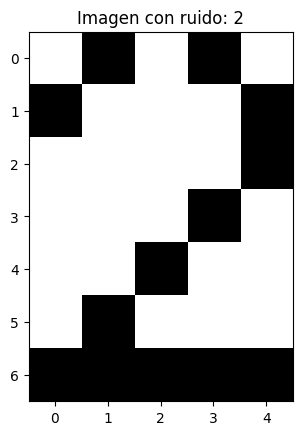

Predicción con ruido para la imagen 2:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
import matplotlib.pyplot as plt
# Función para añadir ruido a las imágenes
def agregar_ruido(imagenes, prob_ruido=0.02):
    imagenes_ruidosas = imagenes.copy()

    np.random.seed(42)
    ruido = np.random.rand(*imagenes.shape) < prob_ruido

    # Invertimos los bits donde hay ruido: 0→1, 1→0
    imagenes_ruidosas[ruido] = 1 - imagenes_ruidosas[ruido]

    return imagenes_ruidosas

imagenes_con_ruido = agregar_ruido(imagenes, 0.02)

predicciones_con_ruido = predecir_perceptron_multi_sigmoidea_bin(imagenes_con_ruido, w, b, W, B)

indice = 2

# Convertimos el vector a una forma 7x5 (o la que tengas)
imagen_reshaped = imagenes_con_ruido[indice].reshape(7, 5)

# Mostramos la imagen
plt.imshow(imagen_reshaped, cmap='binary' )
plt.title(f"Imagen con ruido: {indice}")
plt.show()


print(f"Predicción con ruido para la imagen {indice}: ", predicciones_con_ruido[indice])

In [ ]:
# Predicciones con ruido
# Itera sobre cada predicción e imprime el índice, la salida esperada y la predicción
for i in range(len(predicciones_con_ruido)):
  print(f"Imagen {i}: Esperado = {salidas_binarias[i]}, ║  Predicción = {predicciones_con_ruido[i]}")

Imagen 0: Esperado = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], ║  Predicción = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Imagen 1: Esperado = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], ║  Predicción = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Imagen 2: Esperado = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], ║  Predicción = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Imagen 3: Esperado = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], ║  Predicción = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Imagen 4: Esperado = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], ║  Predicción = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Imagen 5: Esperado = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], ║  Predicción = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Imagen 6: Esperado = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], ║  Predicción = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Imagen 7: Esperado = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], ║  Predicción = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Imagen 8: Esperado = [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], ║  Predicción = [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Imagen 9: Esperado = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], ║  Predicción = [0. 0. 0. 0.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(imagenes, salidas_binarias, test_size=0.3, random_state=42)

# Entrenamiento
w, b, W, B = entrenar_perceptron_multi_sigmoidea_bin(X_train, y_train, capa_oculta=3, tasa_aprendizaje=0.1, max_iteraciones=20000)

# Predicción sobre test
y_pred = predecir_perceptron_multi_sigmoidea_bin(X_test, w, b, W, B)
y_pred_labels = np.argmax(y_pred, axis=1)  # Escogemos la clase con mayor probabilidad

print("Predicciones (etiquetas):", y_pred_labels)
print("Esperado (etiquetas)    :", np.argmax(y_test, axis= 1))

Predicciones (etiquetas): [3 3 0]
Esperado (etiquetas)    : [8 1 5]


In [ ]:
# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imagenes, salidas_binarias, test_size=0.3, random_state=42)

# Entrenamiento sin ruido
w, b, W, B = entrenar_perceptron_multi_sigmoidea_bin(X_train, y_train, capa_oculta=3, tasa_aprendizaje=0.1, max_iteraciones=20000)

# Introducir ruido en los datos de prueba
X_test_ruidoso = agregar_ruido(X_test)

# Predicción sobre datos ruidosos
y_pred = predecir_perceptron_multi_sigmoidea_bin(X_test_ruidoso, w, b, W, B)
y_pred_labels = np.argmax(y_pred, axis=1)  # Escogemos la clase con mayor probabilidad

# Mostrar resultados
print("Predicciones:", y_pred_labels)
print("Esperado    :", np.argmax(y_test, axis=1))

presicion = np.mean(y_pred_labels == np.argmax(y_test, axis=1))
print("Presición con ruido:", presicion)

Predicciones: [3 3 0]
Esperado    : [8 1 5]
Presición con ruido: 0.0


In [ ]:
# Obtener etiquetas verdaderas
etiquetas_reales = np.argmax(salidas_binarias, axis=1)
etiquetas_predichas = np.argmax(predicciones_con_ruido, axis=1)

print("Esperado   :", etiquetas_reales)
print("Predicción con ruido:", etiquetas_predichas)

# Calcular precisión con ruido
precision_con_ruido = np.mean(etiquetas_predichas == etiquetas_reales)
print("Precisión con imágenes ruidosas:", precision_con_ruido)

Esperado   : [0 1 2 3 4 5 6 7 8 9]
Predicción con ruido: [0 1 2 3 4 5 6 7 8 9]
Precisión con imágenes ruidosas: 1.0
